# 預金キャンペーンの契約可能顧客を探す

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bank=pd.read_csv('bank.csv',sep=',')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [2]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,7234.0,40.834808,10.706442,2.0,33.0,39.0,48.00,157.0
balance,7234.0,1374.912911,3033.882933,-3313.0,74.0,453.5,1470.75,81204.0
day,7234.0,15.623860,8.307826,1.0,8.0,16.0,21.00,31.0
duration,7234.0,262.875311,268.921065,0.0,103.0,183.0,321.75,3366.0
campaign,7234.0,2.713989,2.983740,1.0,1.0,2.0,3.00,44.0
pdays,7234.0,40.277716,99.188008,-1.0,-1.0,-1.0,-1.00,850.0
previous,7234.0,0.565939,1.825100,0.0,0.0,0.0,0.00,40.0


In [3]:
bank.isnull().sum()

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [4]:
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [5]:
print(bank.shape)

(7234, 17)


In [6]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [7]:
print(bank.isnull().sum(axis=1))#行方向
print(bank.isnull().sum(axis=0))#列方向

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      3
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      3
       ..
7204    0
7205    0
7206    1
7207    0
7208    0
7209    1
7210    0
7211    0
7212    0
7213    0
7214    0
7215    1
7216    0
7217    0
7218    0
7219    1
7220    0
7221    1
7222    0
7223    0
7224    0
7225    0
7226    0
7227    0
7228    0
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [8]:
bank.describe().transpose()#数値型データの要素数、平均、標準偏差、最小値、第一四分位数、第二四分位数、第三四分位数、最大値

,count,mean,std,min,25%,50%,75%,max
age,7234.0,40.834808,10.706442,2.0,33.0,39.0,48.00,157.0
balance,7234.0,1374.912911,3033.882933,-3313.0,74.0,453.5,1470.75,81204.0
day,7234.0,15.623860,8.307826,1.0,8.0,16.0,21.00,31.0
duration,7234.0,262.875311,268.921065,0.0,103.0,183.0,321.75,3366.0
campaign,7234.0,2.713989,2.983740,1.0,1.0,2.0,3.00,44.0
pdays,7234.0,40.277716,99.188008,-1.0,-1.0,-1.0,-1.00,850.0
previous,7234.0,0.565939,1.825100,0.0,0.0,0.0,0.00,40.0


In [9]:
pd.DataFrame(bank.isnull().sum()).sort_values(by=0,ascending=False)#欠損価のある淳

,0
poutcome,5900
contact,2038
education,273
job,44
month,0
previous,0
pdays,0
campaign,0
duration,0
age,0


In [10]:
bank.select_dtypes(include=object).describe()#object型の統計量、要素数、カテゴリ数、最頻値、最頻値の頻度

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


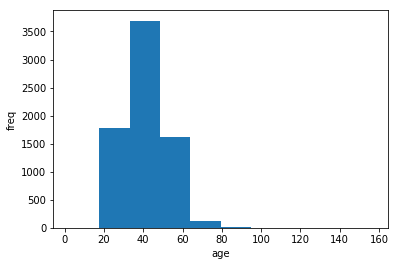

In [11]:
import matplotlib.pyplot as plt

plt.hist(bank.age)
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

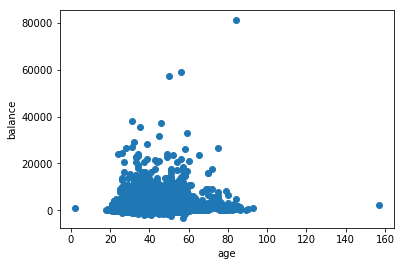

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [12]:
plt.scatter(bank.age,bank.balance)
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank[['age','balance']].corr()#相関係数 数値型とブール型のみ対応

In [13]:
#数値型のカラムについて抽出
ki=list(bank.select_dtypes(include=int).columns)
bank[ ki ].corr()#今回はobjectとint型しかないのでintのみ出力

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112364,-0.015818,0.006794,-0.009235,-0.012872,0.001269
balance,0.112364,1.000000,0.011404,0.009340,-0.024599,0.008960,0.018809
day,-0.015818,0.011404,1.000000,-0.031867,0.166864,-0.100682,-0.073986
duration,0.006794,0.009340,-0.031867,1.000000,-0.080473,0.007870,-0.010503
campaign,-0.009235,-0.024599,0.166864,-0.080473,1.000000,-0.099080,-0.051058
pdays,-0.012872,0.008960,-0.100682,0.007870,-0.099080,1.000000,0.552259
previous,0.001269,0.018809,-0.073986,-0.010503,-0.051058,0.552259,1.000000


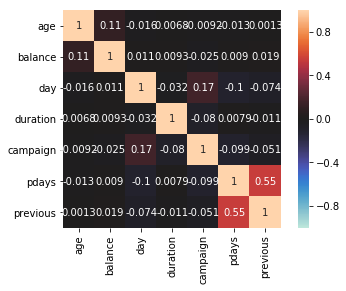

In [14]:
#相関の有無が見ずらいので数値に対応して色を付ける
import seaborn as sns

#pdays と previousに相関がありそう->共線性がある
#共線性があると、モデル作成にかかる計算量の増大、モデルの精度低下、モデルの不安定化が生じる
#http://www.housecat442.com/?p=494
#多重共線性があると、回帰モデルにおいてその相関を持つ変数それぞれの係数（パラメータ）の分散が大きくなる
#どういうとき削らなくて良いか？　相関のある変数に注目していないとき、たた予測性能を上げたい時（汎か性能は無視）
#どういうとき削った方が良いか？　相関のある変数に注目したい時、他の変数と連動しているとその変数自身の影響が読み取れなくなるから

sns.heatmap(bank[ki].corr(), square=True, vmax=1, vmin=-1, center=0,annot=True)

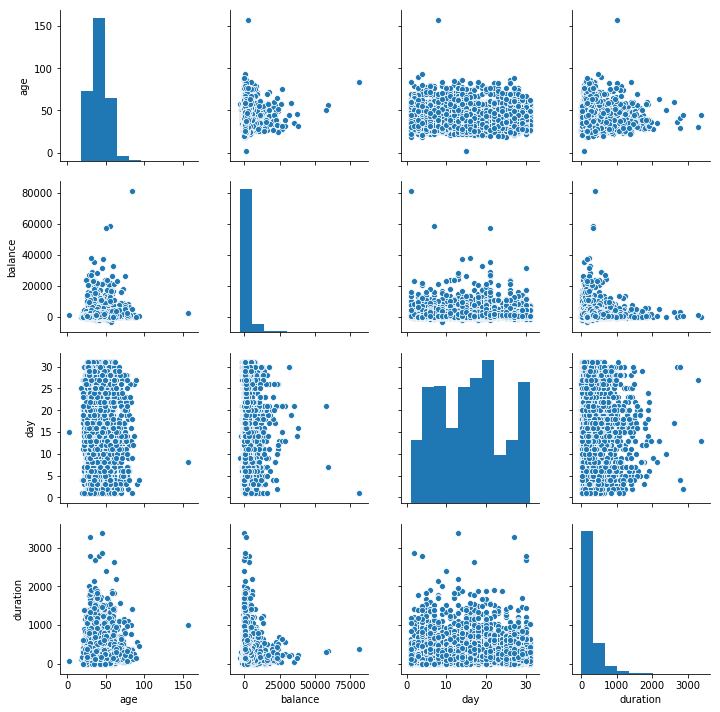

In [15]:
#相関と因果
#相関：双方向性があるものがある　身長と体重、気温とビールの売り上げ
#因果：一方向性がある　犯罪件数が多い->交番が多い

#age,balance,day,durationに対し散布図行列
#heatmapでも見たように相関はほとんど見られない
abdd=['age','balance','day','duration']
sns.pairplot(bank[abdd])

# 散布図行列の意味を探る
https://colab.research.google.com/drive/1UWTE1MVW8iiNEjkRJugb5zOHMHd19wrB#scrollTo=hjB9ANwvxt4U
## 1.変数間の関係を確認する<br>
直線関係なし、曲線関係あり、関係なしのどれであるか<br>
- 直線関係は分散が小さく、かつ直線を形成するようにデータが分布し、それが正負のどちらかに傾いている
- 曲線関係は分散が小さく、かつ曲線を形成するようにデータが分布する
- 関係なしはそもそもデータが何等かの形状に沿うように分布していない。もしくは比例関係がないような分布（帯状に真横、縦）している

## 2.関係の強さ
直線状に分布した場合、その傾きの大きさで相関の強さが把握できる。<br>
相関の強さを定量的に測る場合、ピアソンの相関係数やスピアマンの方法がとれる。
※ピアソンの相関係数は曲線の相関の強さは測れない

## 3.グループ
散布図上にグループが存在する場合、グループごとの相関を調べられる。異なるグループの例、傾きが異なる、位置が異なる、まとまって分布している、など。

## 4.異常
外れ値を探す。外れ値の原因を調べ、偶発的なエラーなのか必然性があるかをモデルに組み込む


In [16]:
#データ型がobjectのjobを円グラフにする
print(bank['job'].value_counts(ascending=False,normalize=True)*100)
#ascendingは出現するを降順にソート（デフォルトは昇順）
#normalize=Trueは正規化の設定

management       21.696801
blue-collar      20.848401
technician       16.773296
admin.           11.599444
services          9.193324
retired           4.881780
self-employed     3.560501
entrepreneur      3.324061
unemployed        3.101530
housemaid         2.892907
student           2.127955
Name: job, dtype: float64


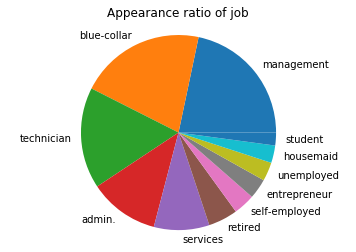

In [17]:

job_label=bank['job'].value_counts(ascending=False,normalize=True).index
job_vals=bank['job'].value_counts(ascending=False,normalize=True).values

plt.pie(job_vals,labels=job_label)#plt.pie(値、label=ラベル)
plt.axis('equal')#アスペクト比
plt.title('Appearance ratio of job')
plt.show()

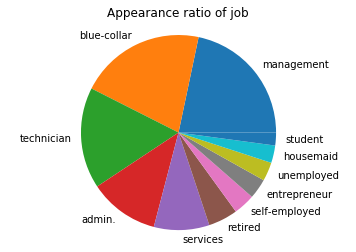

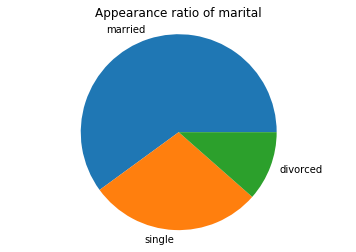

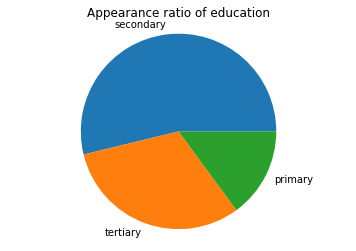

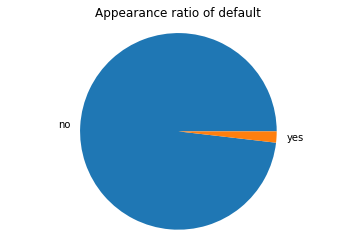

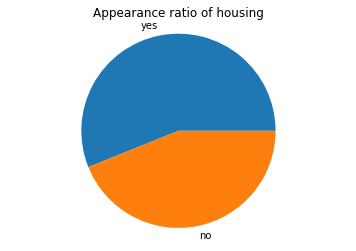

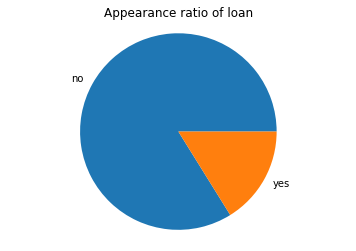

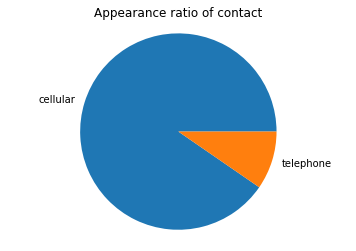

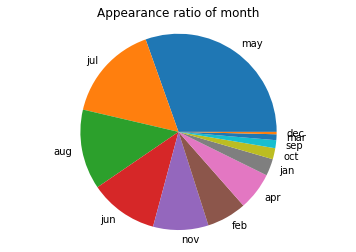

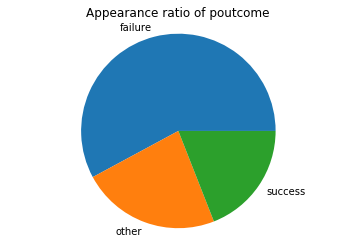

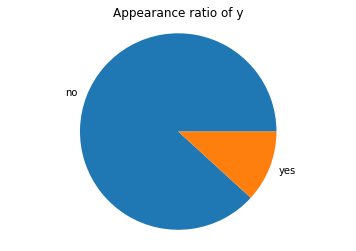

In [18]:
#投げたDataFrameに対して、objectカラムリストを取得、各カラムのカテゴリ変数と値を取得して円グラフを返す関数

def pie_cate(df):
  ki=list(df.select_dtypes(include=object).columns)
  for i in ki:
    job_label=df[i].value_counts(ascending=False,normalize=True).index
    job_vals=df[i].value_counts(ascending=False,normalize=True).values

    plt.pie(job_vals,labels=job_label)#plt.pie(値、label=ラベル)
    plt.axis('equal')#アスペクト比
    plt.title('Appearance ratio of '+str(i))
    plt.show()

pie_cate(bank)
  

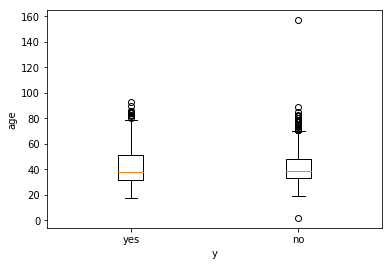

In [19]:
#yについてみると、預金申し込み有り無しが可視化され、不均衡データであることが分かる
#モデルに投げるには均衡であることが望ましい。

#目的変数yに対するデータの分布をみる
y_yes=bank[bank['y']=='yes']#bank['y']の値がyesであるものを抽出
y_no=bank[bank['y']=='no']
y_age=[y_yes['age'],y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax=plt.gca()
ax.set_xticklabels(['yes', 'no'])
plt.show()

In [20]:
ki=list(bank.select_dtypes(include=object).columns)
ki



bank[ki[0]].unique()

array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       nan, 'housemaid'], dtype=object)

# データ準備

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bank=pd.read_csv('bank.csv',sep=',')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [36]:
print(bank.shape)
print(bank.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [37]:
ke=pd.DataFrame(bank.isnull().sum())
ko=ke.index
ke.sort_values(by=0,ascending=False)

,0
poutcome,5900
contact,2038
education,273
job,44
month,0
previous,0
pdays,0
campaign,0
duration,0
age,0


In [38]:
#欠損価の除外
bank=bank.dropna(subset=['job','education'])
print(bank.shape)

(6935, 17)


In [0]:
#drop
bank.drop('poutcome',axis=1,inplace=True)

In [40]:
bank.shape

(6935, 16)

In [41]:
bank=bank.fillna({'contact':'unknown'})
bank['contact'].head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: contact, dtype: object

In [42]:
#外れ値
bank=bank[bank['age']>=18]#顧客年齢の下限
bank=bank[bank['age']<=100]#顧客年齢の上限

print(bank['age'].describe())

count    6933.000000
mean       40.664647
std        10.520371
min        19.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        90.000000
Name: age, dtype: float64


In [43]:
#文字列の数値型への変換
bank=bank.replace('yes',1)
bank=bank.replace('no',0)
print(bank.shape)

(6933, 16)


In [0]:
#job
bank_obj=bank.select_dtypes(include=object)
bank_obj=pd.get_dummies(bank_obj)
# bank_job=pd.get_dummies(bank['job'])
# bank_job.head()

In [50]:
#分析データセットの作成

tmp1=bank.select_dtypes(include=int)
tmp1.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [51]:
print(type(bank_obj),type(tmp1))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [52]:
bank_new=pd.concat([tmp1,bank_obj],axis=1)#concatでaxis=1は列方向に対して垂直に結合
bank_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
#csvに出力
bank_new.to_csv('bank_new.csv',index=False)

In [0]:
"""
結合方法：
DBに共有するデータ（例えば、顧客データやタイムスタンプ）同士を結合する際、行方向お結合基準をIDに置く方法が一般的

内部結合（Inner Join）：二つのDB（A,B）のキー（ID）が一致するデータのみ抽出
外部結合（Outer Join）：二つのDB（A,B）のキーとそれに紐づくデータを全て抽出
左結合（Left Join）：左DB(A)のキーに一致するデータをA,Bから抽出
右結合（Right Join）:右DB(B)のキーに一致するデータをA,Bから抽出

"""

A=pd.DataFrame({'ID':[1,2,3],'name':['鳴上　悠','東方　仗助','ジョージ']})
B=pd.DataFrame({'ID':[2,3,4],'adress':['八幡','社王町','サハラ']})

inner=pd.merge(A,B,on='ID',how='inner')
outer=pd.merge(A,B,on='ID',how='outer')
left=pd.merge(A,B,on='ID',how='left')
right=pd.merge(A,B,on='ID',how='right')

In [58]:
print("inner",inner)
print("\n")
print("outer",outer)
print("\n")
print("left",left)
print("\n")
print("right",right)

inner    ID   name adress
0   2  東方　仗助     八幡
1   3   ジョージ    社王町


outer    ID   name adress
0   1   鳴上　悠    NaN
1   2  東方　仗助     八幡
2   3   ジョージ    社王町
3   4    NaN    サハラ


left    ID   name adress
0   1   鳴上　悠    NaN
1   2  東方　仗助     八幡
2   3   ジョージ    社王町


right    ID   name adress
0   2  東方　仗助     八幡
1   3   ジョージ    社王町
2   4    NaN    サハラ


In [59]:
#データの読み込み
import pandas as pd

bank=pd.read_csv('bank_new.csv',sep=',')
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
#不均衡データの成形
# UnderSampling 多数クラスをシャッフルし、少数クラスと同件数文抽出
#OverSamplong 少数クラスから多数クラスを同件数文、復元抽出

!pip install imbalanced-learn


In [62]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

#実例：製造業で機械の故障ログは少数クラスに該当する
#学習に必要なデータ件数が足りない場合、オーバーサンプリングを行うこともある

#複製ではなく、類似したデータの生成を行う->SMOTE
#データ点の近傍のデータ点の特徴量の際にノイズを掛けた値を取り出す

X=np.array(bank.drop('y',axis=1))#目的変数以外
Y=np.array(bank['y'])#目的変数
print(np.sum(Y==1),np.sum(Y==0))#データ件数がクラスごとで不均衡

sampler=RandomUnderSampler(random_state=42)#ランプリング条件を設定
X,Y=sampler.fit_resample(X,Y)    
print(np.sum(Y==1),np.sum(Y==0))#データ件数がクラスごとに均一化されている。注意するのは元のデータの分布は保存されていないこと


820 6113
820 820


In [63]:
#決定木による学習
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

kf=KFold(n_splits=10,shuffle=True)
scores=[]

for train_id,test_id in kf.split(X):
  x=X[train_id]
  y=Y[train_id]
  clf=tree.DecisionTreeClassifier()
  clf.fit(x,y)
  pred_y=clf.predict(X[test_id])
  score=accuracy_score(Y[test_id],pred_y)
  scores.append(score)

scores=np.array(scores)
print(scores.mean(),scores.std())


0.7780487804878049 0.0417315576396797


In [66]:
#再現率や適合率
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("再現率：%.3f"%recall_score(Y[test_id],pred_y))
print("適合率：%.3f"%precision_score(Y[test_id],pred_y))


再現率：0.797
適合率：0.808


In [70]:
#パラメータの最適化
print(clf)#各種パラメータの設定が確認可能
#分割指標 criterion ジニ係数
#木の最大深さ　max_depth　は指定なし
#葉の最小データ数 min_sample_leafは1
#グリッドサーチでモデルの精度が高くなるパラメータの組み合わせを探す

from sklearn.model_selection import GridSearchCV

params={
    'criterion':['entropy'],
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[10,20,30,40,50],
}

clf_gs=GridSearchCV(tree.DecisionTreeClassifier(),params,
                    cv=KFold(n_splits=10,shuffle=True),scoring='accuracy')
clf_gs.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy'],
                      

In [71]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.7945121951219513
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 30}


In [73]:
clf_best=tree.DecisionTreeClassifier(
    criterion='entropy',max_depth=8,min_samples_leaf=30
)

clf_best.fit(X,Y)

print(clf_best.feature_importances_)

[0.02064796 0.         0.04496383 0.09722309 0.         0.01289424
 0.5862666  0.03966014 0.07039707 0.04540341 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00647436 0.
 0.         0.         0.00379607 0.         0.         0.05808187
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01419135 0.         0.         0.        ]
